# `Business Statistics: EDA & Insurance claims`

Objective – Explore the dataset and extract insights from the data. Using statistical evidence to

* Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
* Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
* Is the proportion of smokers significantly different across different regions?
* Is the mean BMI of women with no children, one child, and two children the same?

# Context
Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. 

# Data Set 
- Age :- This is an integer indicating the age.
- Sex :- This is the  gender, either male or female.
- BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.
- Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.
- Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges​ :- Individual medical costs billed to health insurance

# Question to be answered
- Are there more Male beneficiary ?
- Are there more or less smoker ?
- Which region has maximum medical cost billed to health insurance ?
- In which range are majority of beneficiary ?
- Do beneficiary having more dependents had more medical cost billed ?

# Libraries

In [1]:
from warnings import filterwarnings

# Suppress all warnings.
filterwarnings('ignore')

In [2]:
# Working with statistical functions
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Working with matrices and operations on them
import numpy as np

# Working with data manipulation and read
import pandas as pd

# Working with graphical representation
import matplotlib.pyplot as plt
import seaborn as sns

# Working with typings (type hintings)
from pandas import DataFrame

# Changing theme
sns.set()

# Read and understand the data

In [3]:
# Reading CSV file

insurance = pd.read_csv('./insurance.csv')

In [4]:
# Getting acquainted with our data.
# First , we see first 5 example

insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Getting information about our dataframe by
# 1.) How many rows we have
# 2.) How many columns we have
# 3.) What are the features we have
# 4.) What is the target we have
# 5.) How many missing values in each column
# 6.) How many unique values in each column

print('1.) Row count : {}'.format(insurance.shape[0]))
print('2.) Column count : {}\n'.format(insurance.shape[1]))

print('3.) Features : {}'.format(insurance.columns.tolist()[:- 1]))
print('4.) Target : {}\n'.format([insurance.columns.tolist()[-1]]))

print('5.) Missing Values in each column : \n{}\n'.format(insurance.isna().sum()))

print('6.) Count of Unique values in each column : \n{}'.format(insurance.nunique()))

1.) Row count : 1338
2.) Column count : 7

3.) Features : ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
4.) Target : ['charges']

5.) Missing Values in each column : 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

6.) Count of Unique values in each column : 
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [6]:
# We can also get extra information about data types

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Types of Variables**
- Categorical varibles - sex, smoker, region, children
- Quantitative variables -age, bmi, charges. Here children is a discrete variable where as age, bmi, and charges are continous variables.

In [7]:
# We can also get statistical information about our data such as (count, mean, std, min, max and last but not least quantiles)

insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Observations**
- Average age of the primary beneficiary is 39.2 and maximum age is 64.
- Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13.
- Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770.
- Median is less than mean value in charges, indicating distribution is positively skewed.
- Customer on average has 1 child.
- For Age, BMI and Children, Mean value is almost equal to median, suggesting data is normally distributed. 

        count
sex          
female    662
male      676


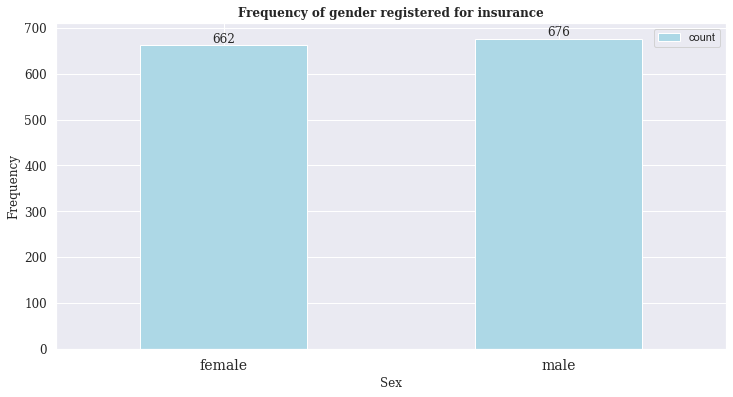

In [8]:
# Question No : 1
# Are there more male beneficiary ?

_count_sex = insurance.groupby('sex', as_index = False)['sex'].value_counts().set_index('sex')

fig, ax = plt.subplots()
_count_sex.plot(kind='bar', figsize=(12, 6), color=['lightblue'], ax=ax)

ax.annotate(f'{_count_sex.loc["female"][0]}', 
            xy=(0, _count_sex.loc["female"][0] * 1.02), ha='center', va='center', fontfamily='serif', fontsize=12)

ax.annotate(f'{_count_sex.loc["male"][0]}', 
            xy=(1, _count_sex.loc["male"][0] * 1.02), ha='center', va='center', fontfamily='serif', fontsize=12)

ax.set_title('Frequency of gender registered for insurance', fontdict={'fontfamily' : 'serif',
                                                                       'fontweight' : 'bold'})

ax.set_xlabel('Sex', fontdict={'fontfamily' : 'serif'})
ax.set_ylabel('Frequency', fontdict={'fontfamily' : 'serif'})

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontfamily' : 'serif'})

ax.tick_params(axis='x', labelrotation=0, labelsize=14)
ax.tick_params(axis='y', labelrotation=0, labelsize=12)

print(_count_sex)

plt.show()

        count
smoker       
no       1064
yes       274


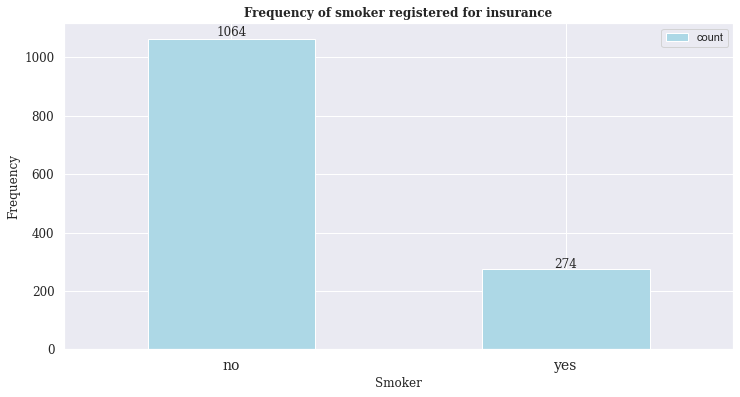

In [9]:
# Question No : 2
# Are there more or less smoker ?

_count_smoker = insurance.groupby('smoker', as_index=False)['smoker'].value_counts().set_index('smoker')

fig, ax = plt.subplots()
_count_smoker.plot(kind='bar', figsize=(12, 6), color=['lightblue'], ax=ax)

ax.annotate(f'{_count_smoker.loc["no"][0]}', 
            xy=(0, _count_smoker.loc["no"][0] * 1.02), ha='center', va='center', fontfamily='serif', fontsize=12)

ax.annotate(f'{_count_smoker.loc["yes"][0]}', 
            xy=(1, _count_smoker.loc["yes"][0] * 1.06), ha='center', va='center', fontfamily='serif', fontsize=12)

ax.set_title('Frequency of smoker registered for insurance', fontdict={'fontfamily' : 'serif',
                                                                       'fontweight' : 'bold'})

ax.set_xlabel('Smoker', fontdict={'fontfamily' : 'serif'})
ax.set_ylabel('Frequency', fontdict={'fontfamily' : 'serif'})

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontfamily' : 'serif'})

ax.tick_params(axis='x', labelrotation=0, labelsize=14)
ax.tick_params(axis='y', labelrotation=0, labelsize=12)

print(_count_smoker)

plt.show()

Region that has maximum medical cost billed to health insurance : southeast , Charge : 63770.42801


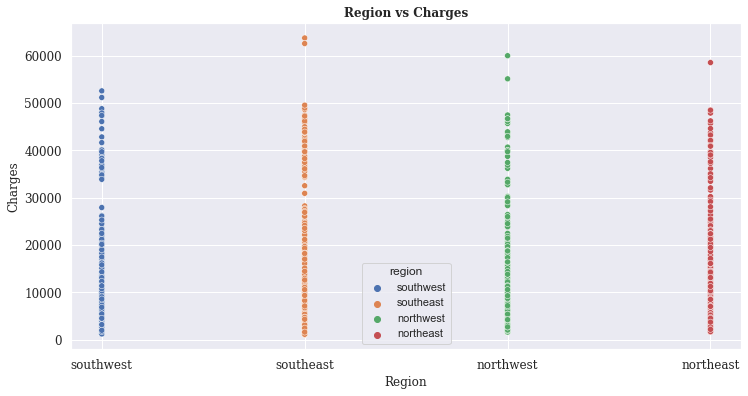

In [10]:
# Question No : 3
# Which region has maximum medical cost billed to health insurance ?

fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=insurance[['region', 'charges']], x='region', y='charges', hue='region', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontfamily' : 'serif'})

ax.set_xlabel('Region', fontdict={'fontfamily' : 'serif'})
ax.set_ylabel('Charges', fontdict={'fontfamily' : 'serif'})

ax.set_title('Region vs Charges', fontdict={'fontfamily' : 'serif',
                                            'fontweight' : 'bold'})

ax.tick_params(axis='both', labelrotation=0, labelsize=12)

print('Region that has maximum medical cost billed to health insurance : {} , Charge : {}' \
      .format(*insurance[['region', 'charges']].sort_values(by='charges', ascending=False).iloc[0]))
      
plt.show()

**Observations**
- 676 male and 662 female, indicated sample has slightly more males than females.
- 1064 non-smoker and 274 smoker, indicated sample has significantly more non-smokers than smokers.
- Region that has maximum medical cost billed to health insurance is southeast.

# Exploratory Data Analysis

## Univariate Analysis

In [11]:
# Creting a function that will help us see central tendency, dispersion and outliers of `numerical` features.

def distribution_of_quantitative_features(data : DataFrame):

    numerical_features = data.select_dtypes(include=np.number)
    
    _nrows, _ncols = len(numerical_features.columns) , 2
    height_ratios = [0.1 if i % 2 == 0 else 1 / (_nrows // 2) - 0.1  for i in range(_nrows)]

    fig, axs = plt.subplots(nrows=_nrows, ncols=_ncols, figsize=(20, 14), 
                            gridspec_kw={'height_ratios' : height_ratios}, constrained_layout=True)
    
    # fig.suptitle('Spread of data for `{}`'.format(feature.capitalize()), fontsize=15, fontfamily='serif', fontweight='bold')
    fig.suptitle('Graphical Representation of Quantitative data (Box, Distribution plot)', fontsize=15, fontfamily='serif', fontweight='bold')

    for i in range(0, _nrows, 2):
        for j in range(_ncols):
            
            feature = numerical_features.columns[i + j]
            ax_box, ax_dist = axs[i][j], axs[i + 1][j]

            # Drawing box and histogram plot
            sns.boxplot(data=numerical_features, x=feature, ax=ax_box, 
                        showmeans=True, color='lightblue')
            
            sns.histplot(data=numerical_features, x=feature, ax=ax_dist, 
                        color='lightblue')
            
            # Getting mean, mode and median
            _mean = numerical_features[feature].mean()
            _mode = numerical_features[feature].mode().tolist()[-1]
            _median = numerical_features[feature].median()

            ax_dist.axvline(_mean, color='salmon', linewidth=2, linestyle='--')
            ax_dist.axvline(_mode, color='lime', linewidth=2, linestyle='-')
            ax_dist.axvline(_median, color='yellow', linewidth=2, linestyle='-')

            ax_dist.legend({
                'Mean' : _mean,
                'Mode' : _mode,
                'Median' : _median
            })

            # Design work
            ax_box.set_xticklabels([])
            ax_box.set_xlabel('')

            ax_dist.set_xticklabels(ax_dist.get_xticklabels(), fontdict={'fontfamily' : 'serif'})
            ax_dist.set_yticklabels(ax_dist.get_yticklabels(), fontdict={'fontfamily' : 'serif'})

            ax_dist.set_xlabel(ax_dist.get_xlabel(), fontdict={'fontfamily' : 'serif', 'fontweight' : 'bold'})
            ax_dist.set_ylabel('Frequency', fontdict={'fontfamily' : 'serif'})

            ax_dist.tick_params(axis='both', labelsize=12)

            ax_box.set_title('Spread of data for `{}`'.format(feature.capitalize()), fontsize=13, fontfamily='serif', fontweight='bold')

    plt.show()

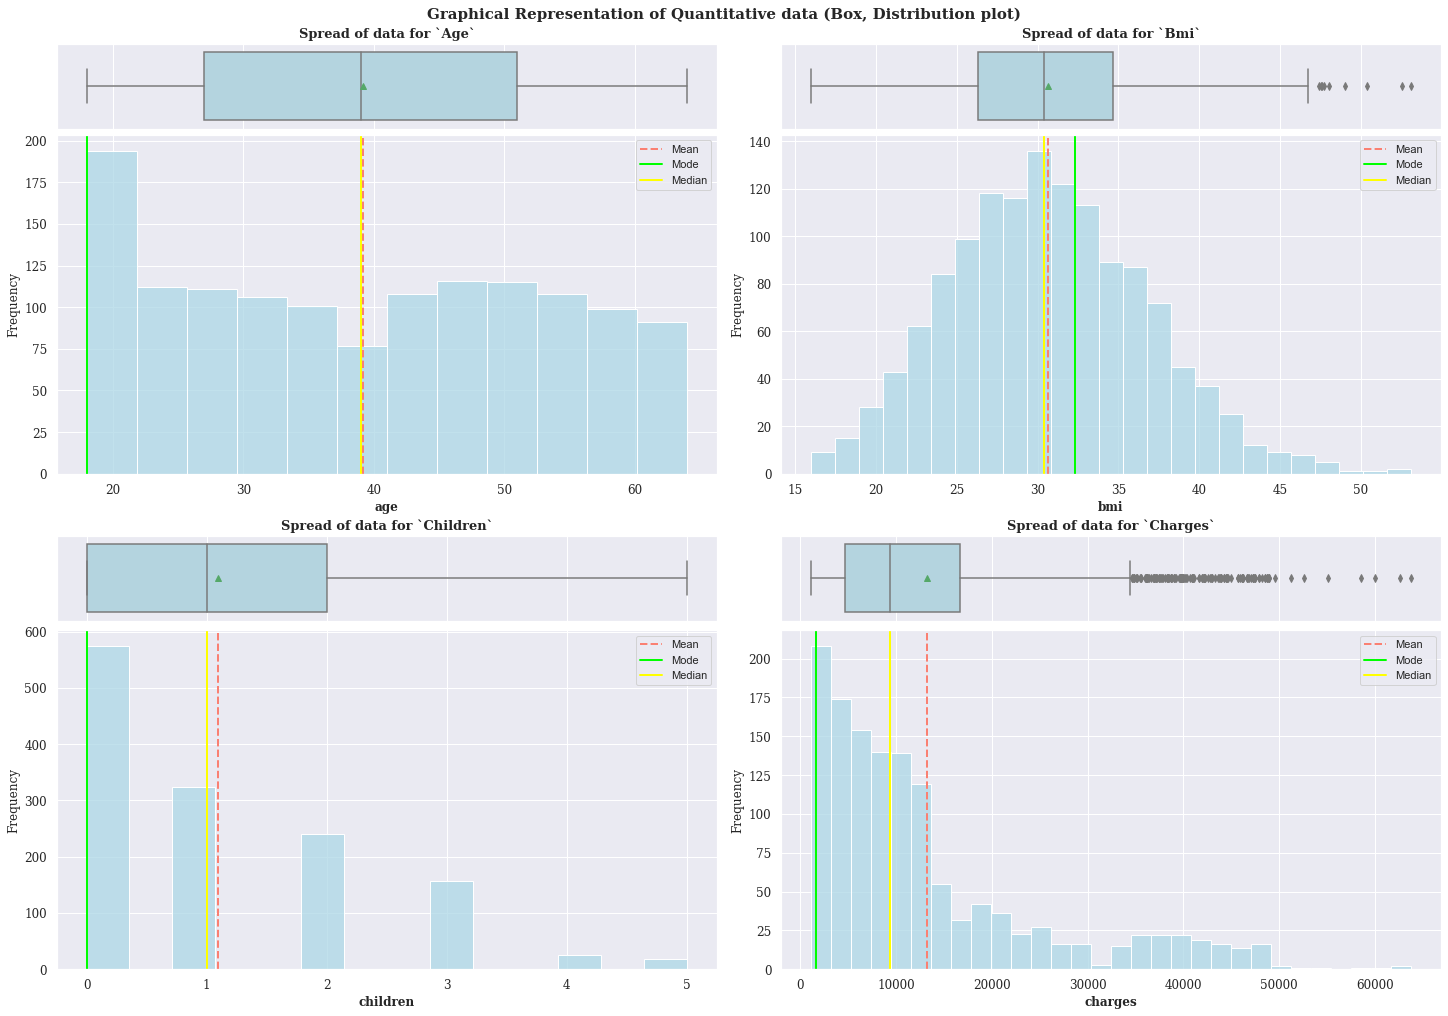

In [12]:
distribution_of_quantitative_features(insurance)

**Observations**
- Age of beneficiary lies approximately between 20 - 64. Average age is approximately 40. Majority of customers are in range of 18 - 20. (Question No : 4)
- BMI is normally distributed and Average BMI is approximately 30. This BMI is outside the range of normal BMI. There are lot of outliers at the end.
- Most of beneficiary don't have children.
- Charges distribution is right skewed. Average value incurred to the insurance is approximately 13000 an highest charge is approximately 61000. There are a lot of outliers at the end.

In [13]:
# Now, this time, we will inspect categorical variables by plotting `barPlots`. 

def distribution_of_categorical_feautres(data : DataFrame):

    categorical_features = insurance.select_dtypes(include=np.object)

    _nrows, _ncols = 1, len(categorical_features.columns)

    fig, axs = plt.subplots(nrows=_nrows, ncols=_ncols, figsize=(20, 8))

    fig.suptitle('Graphical Representation of Categorical data (Bar Plot)', fontsize=15, fontfamily='serif', fontweight='bold')

    for i, ax in enumerate(axs.flatten()):
        feature_name = categorical_features.columns[i]
        _count_of_value = categorical_features[feature_name].value_counts(normalize=True) 

        ax.bar(_count_of_value.index , _count_of_value.values * 100, color=['lightblue', 'salmon'])

        # Design

        for key, val in _count_of_value.items():
            ax.annotate(f'{round(val * 100, 2)} %', 
                        xy=(key, 1.05 * val * 100), ha='center', va='center', fontsize=14, fontfamily='serif')
            
        ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12,
                                                           'fontfamily' : 'serif'})
        ax.set_yticklabels(np.arange(0, 101, 20), fontdict={'fontsize' : 12,
                                                           'fontfamily' : 'serif'})
        ax.set_ylim((0, 100))

    plt.show()

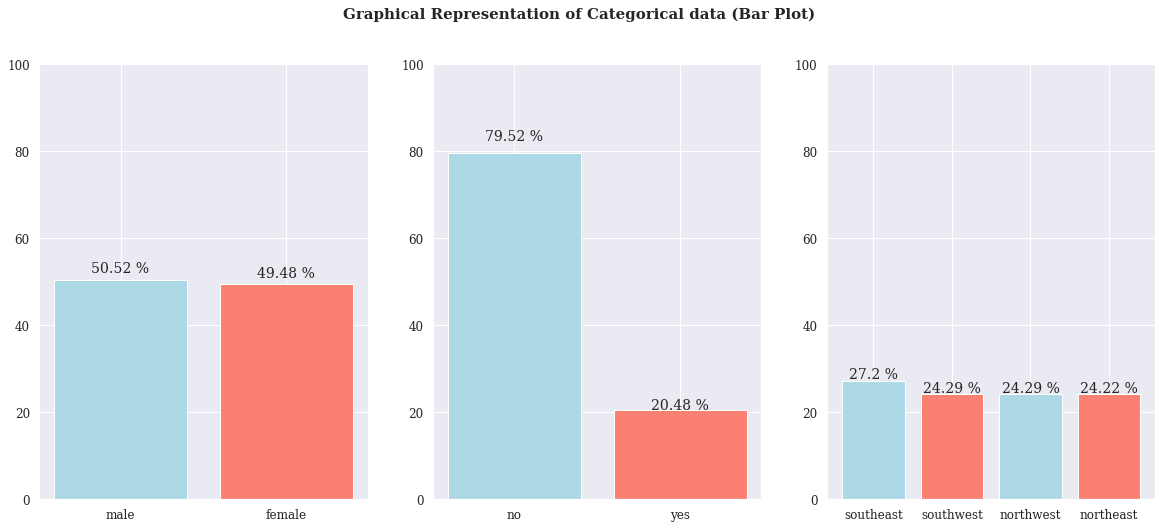

In [14]:
distribution_of_categorical_feautres(insurance)

**Observations**
- 50.52 % of beneficiary are male and 49.48% are female. Approximately same number of male and female beneficiary.
- 20.48 % of beneficiary are smoker.
- Beneficiary are evenly distributed across regions with `Southeast` being the most populous ~ 27 % and the rest of each region containing ~ 24 %.

## Bivariate & Multivariate Analysis

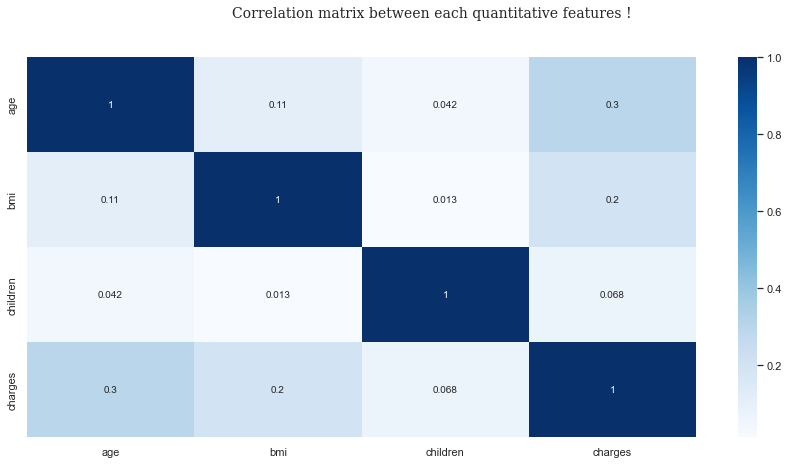

In [15]:
plt.figure(figsize=(15, 7))

sns.heatmap(insurance.corr(), annot=True, cmap='Blues')

plt.suptitle('Correlation matrix between each quantitative features !', fontsize=14, fontfamily='serif')
plt.show()

**Observations**
- There is very little significant correlation between `Charges` & `Age` and `Charges` & `BMI`

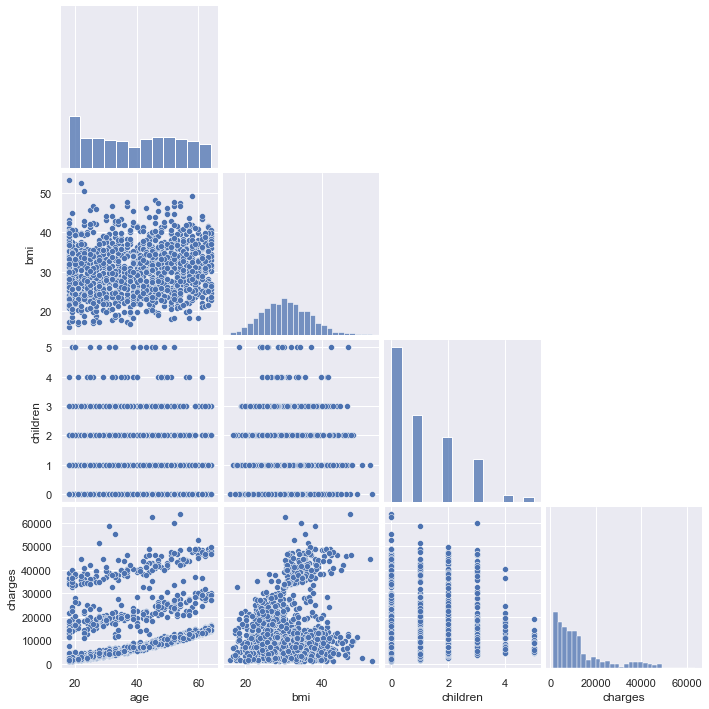

In [16]:
# Let's see the relationship between quantitative features
sns.pairplot(data=insurance, corner=True)

plt.show()

In [17]:
# Now, Let's see relationship between categorical features and quantitative features by plotting box plots.

def bivariate_distributions(data : DataFrame):

    quantitative_variables = insurance.select_dtypes(include=np.number)
    categorical_variables = insurance.select_dtypes(include=np.object)

    for cat_var in categorical_variables:
        fig, axs = plt.subplots(nrows=len(quantitative_variables.columns) // 2, ncols=2, 
                                figsize=(12, 9), constrained_layout=True)
        
        fig.suptitle(f'Bivariate relationship between {cat_var.capitalize()} and quantitative features !', 
                     fontsize=14, fontweight='bold', fontfamily='serif')

        _flatten_axes = axs.flatten()
        _ax_ind = 0

        for quan_var in quantitative_variables:
            ax = _flatten_axes[_ax_ind]

            sns.boxplot(x=categorical_variables[cat_var], 
                        y=quantitative_variables[quan_var], showmeans=True, ax=ax)
            
            # Design
            ax.set_title(f'{cat_var.capitalize()} Vs {quan_var.capitalize()}', fontdict={'fontweight' : 'bold',
                                                                                         'fontsize' : 13,
                                                                                         'fontfamily' : 'serif'})

            ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12,
                                                               'fontfamily' : 'serif'})

            
            ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12,
                                                     'fontfamily' : 'serif'})
            ax.set_ylabel(ax.get_ylabel().capitalize(), fontdict={'fontsize' : 12,
                                                     'fontfamily' : 'serif'})

            ax.tick_params(axis='y', labelsize=13)
            
            
            _ax_ind+= 1   

    plt.show()

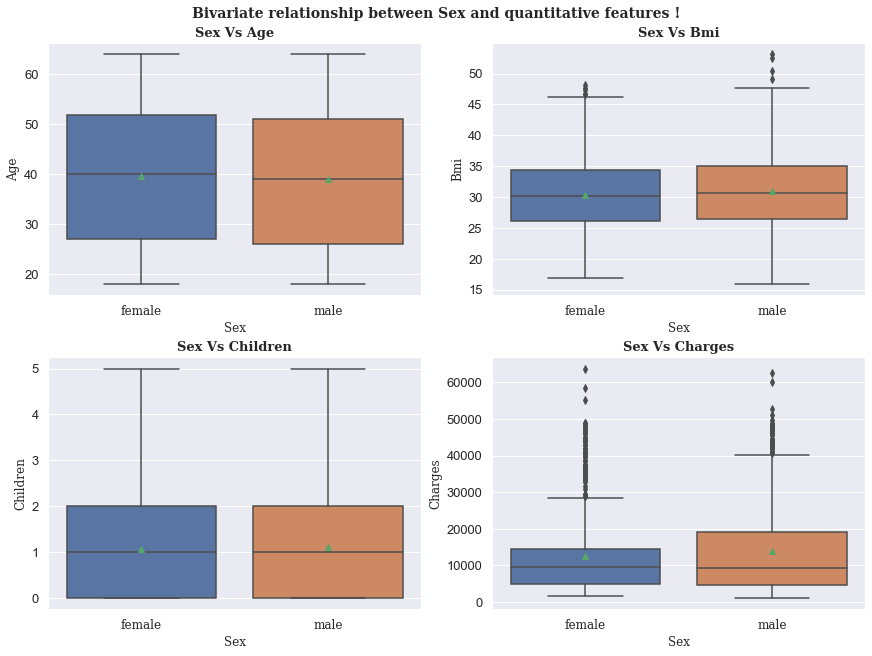

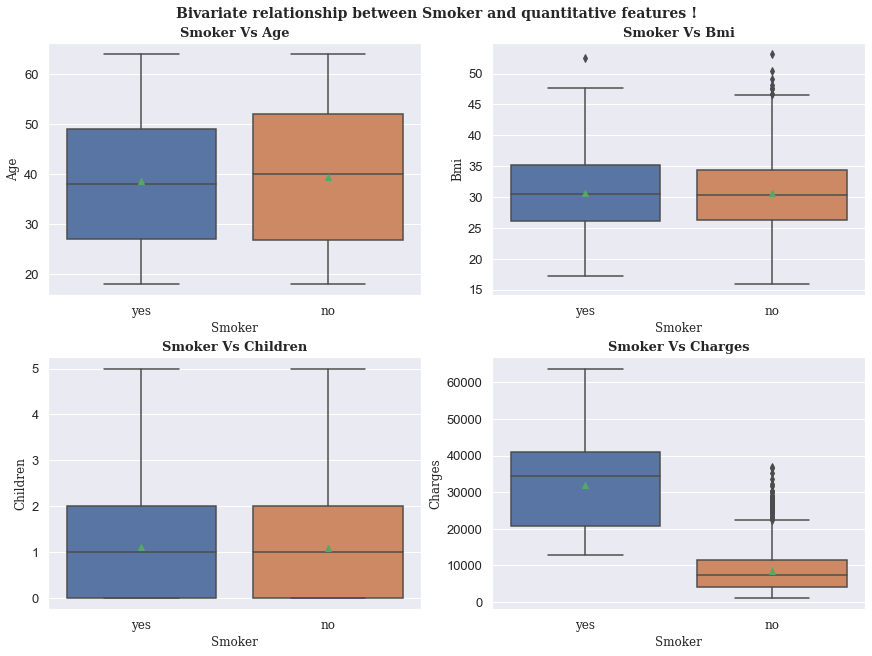

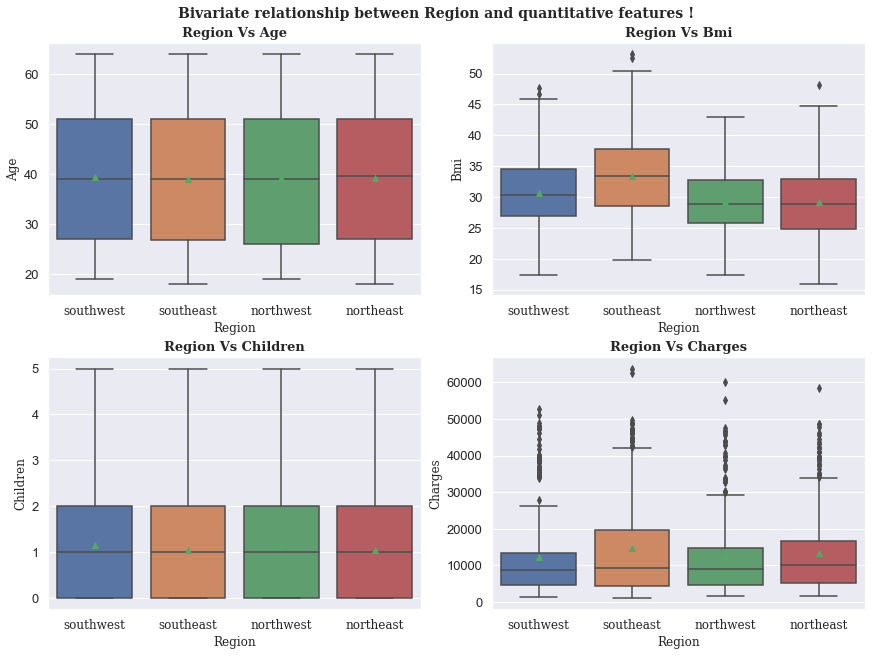

In [18]:
bivariate_distributions(insurance)

**Observations** : First Graph
- Average age of female beneficiaries is slightly higher than male beneficiaries.
- Number of childern both female and male beneficiaries have is same.
- Male beneficiaries have more outliers than female beneficiaries. Also, Average of Male BMI is slightly higher than females.
- Male policyholders have incurred more charges to insurance than females. There are a lot of outliers in females.

**Observations** : Second Graph
- BMI of non-smokers have many outliers.
- Smokers have incurred more charges to insurance than non-smokers. Also, There are lots of outliers in non-smokers.

**Observations** : Third Graph
- Ages across Region are almost same.
- Average BMI of policyholders from `southeast` is higher compared to others.
- There are lot of outliers in charges. 

In [19]:
def annotate_bar_percentages(ax):
    
    _heights_arr = [patch.get_height() for patch in ax.patches]
    _sum = sum(_heights_arr)

    for i, _patch in enumerate(ax.patches):
        val = '{:.2f} %'.format(100 * _heights_arr[i] / _sum)
        
        ax.annotate(val, xy=(_patch.get_x() + 0.2, _patch.get_height() + 10),
                    ha='center', va='center', fontsize=14, fontfamily='serif')

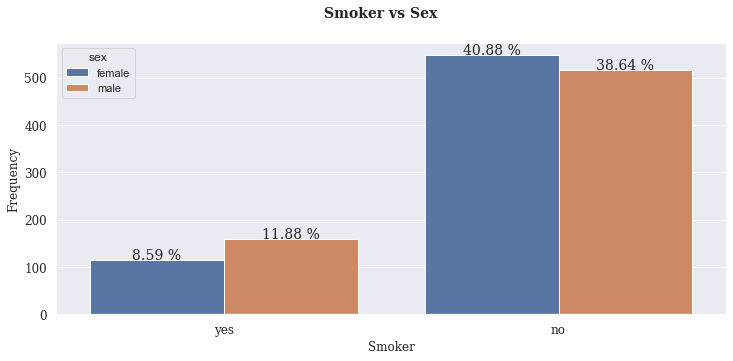

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.countplot(data=insurance, x='smoker', hue='sex', ax=ax)
annotate_bar_percentages(ax)

# Design
fig.suptitle('Smoker vs Sex', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})
ax.set_ylabel('Frequency', fontdict={'fontsize' : 12, 
                                     'fontfamily' : 'serif'})

plt.show()

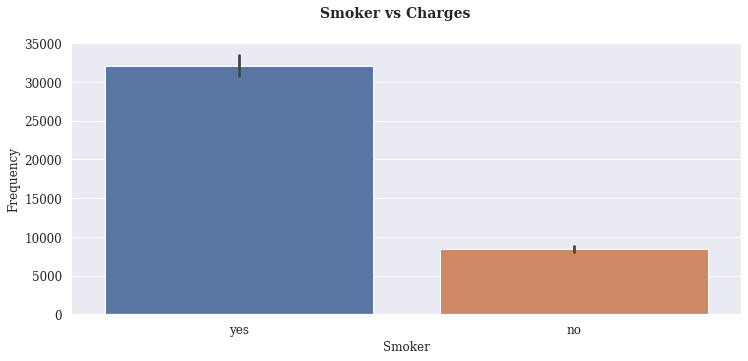

In [21]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(data=insurance, x='smoker', y='charges', ax=ax)

# Design
fig.suptitle('Smoker vs Charges', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})
ax.set_ylabel('Frequency', fontdict={'fontsize' : 12, 
                                     'fontfamily' : 'serif'})

plt.show()

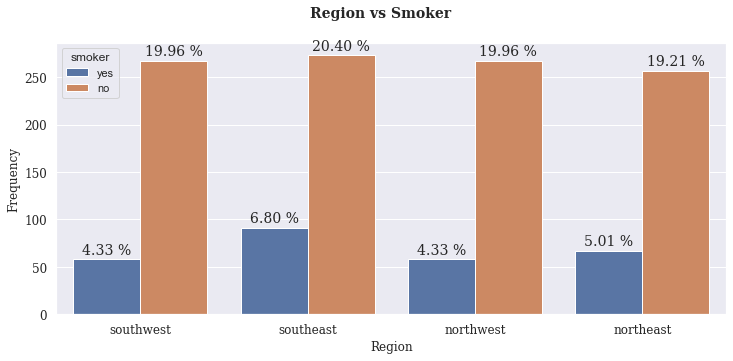

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.countplot(data=insurance, x='region', hue='smoker', ax=ax)

annotate_bar_percentages(ax)

# Design
fig.suptitle('Region vs Smoker', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})
ax.set_ylabel('Frequency', fontdict={'fontsize' : 12, 
                                     'fontfamily' : 'serif'})

plt.show()

**Observations**
- Male policyholders are higher than females in smoking.
- In `Southeast`, there is higher smoker rate than compared to others.
- Smokers have more costlier claims than non-smokers.

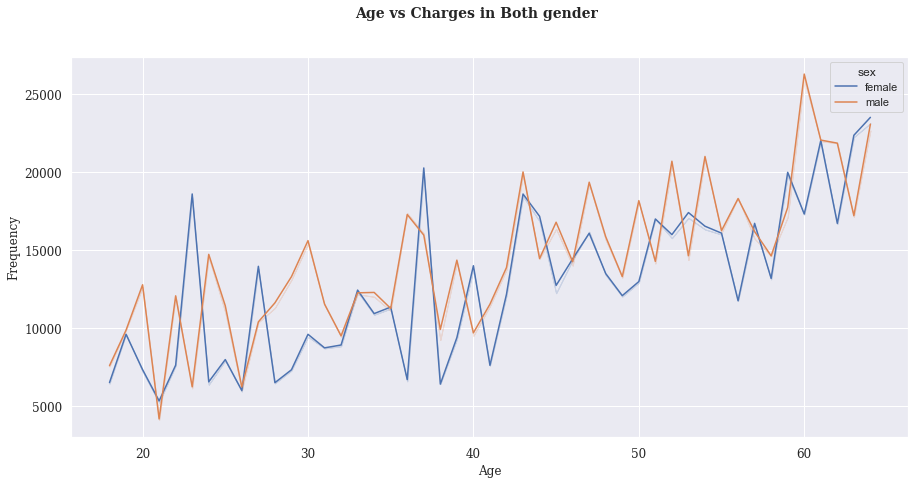

In [23]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(data=insurance, x='age', y='charges', hue='sex', ax=ax, ci=0)

# Design
fig.suptitle('Age vs Charges in Both gender', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})
ax.set_ylabel('Frequency', fontdict={'fontsize' : 12, 
                                     'fontfamily' : 'serif'})

plt.show()

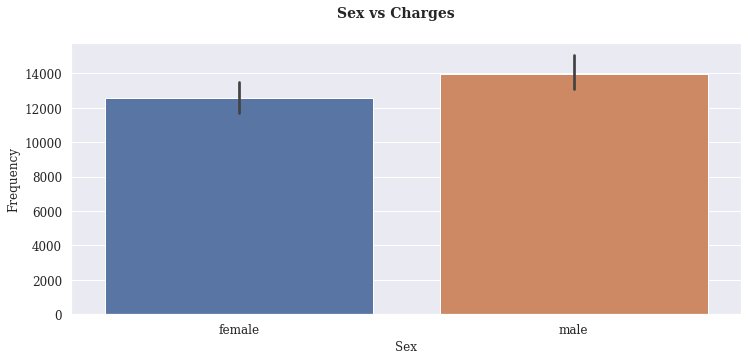

In [24]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(data=insurance, x='sex', y='charges', ax=ax)

# Design
fig.suptitle('Sex vs Charges', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})
ax.set_ylabel('Frequency', fontdict={'fontsize' : 12, 
                                     'fontfamily' : 'serif'})

plt.show()

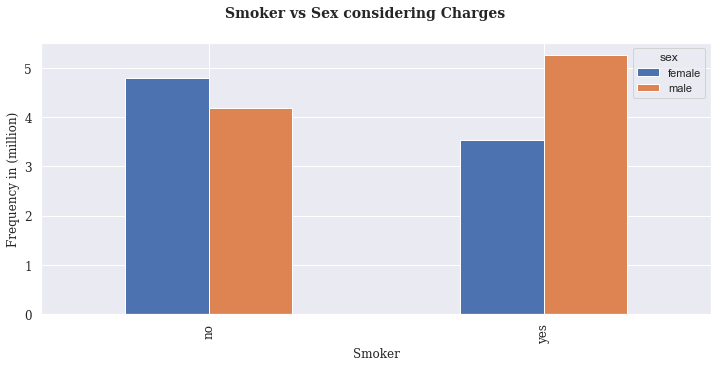

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))

pd.crosstab(index=insurance['smoker'], columns=insurance['sex'], 
            values=insurance['charges'], aggfunc='sum').plot(kind='bar', ax=ax)

# Design
fig.suptitle('Smoker vs Sex considering Charges', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})
ax.set_ylabel('Frequency in (million)', fontdict={'fontsize' : 12, 
                                     'fontfamily' : 'serif'})

plt.show()

**Observations**
- Charges incurred for men are more than charges incurred for women
- With increasing age of policyholder is directly proportional to charges in both gender.
- There are some spikes for female at approximately 23, 38, 43 ages.
- Male who smokes have most claims and and have higher bills.
- Number of claims made by female who don't smoke is more compared to female who smokes.

In [26]:
# Now, we will look carefully in `Age` and `BMI` by dividing it into bins and analyze.

# Since, pd cut function doesn't include values start and finish, I subtract 18 - 1 to include 18 too.

_age_category = pd.cut(x=insurance['age'], bins=np.arange(17, 77, 10), 
                       labels=[f'{val} - {val + 10}' for val in np.arange(18, 68, 10)])

_bmi_category = pd.cut(x=insurance['bmi'], bins=np.arange(15, 65, 10), 
                       labels=[f'{val} - {val + 10}' for val in np.arange(15, 55, 10)])

insurance['Age Group'] = _age_category
insurance['BMI Group'] = _bmi_category

In [27]:
# Seeing if changes are applied
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,Age Group,BMI Group
0,19,female,27.900,0,yes,southwest,16884.92400,18 - 28,25 - 35
1,18,male,33.770,1,no,southeast,1725.55230,18 - 28,25 - 35
2,28,male,33.000,3,no,southeast,4449.46200,28 - 38,25 - 35
3,33,male,22.705,0,no,northwest,21984.47061,28 - 38,15 - 25
4,32,male,28.880,0,no,northwest,3866.85520,28 - 38,25 - 35


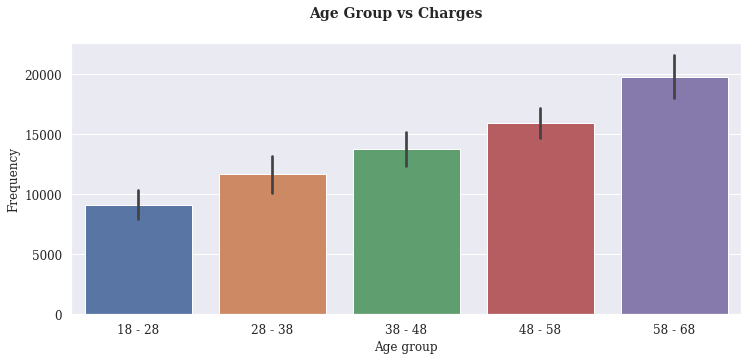

In [28]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(data=insurance, x='Age Group', y='charges', ax=ax)

# Design
fig.suptitle('Age Group vs Charges', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})
ax.set_ylabel('Frequency', fontdict={'fontsize' : 12, 
                                     'fontfamily' : 'serif'})

plt.show()

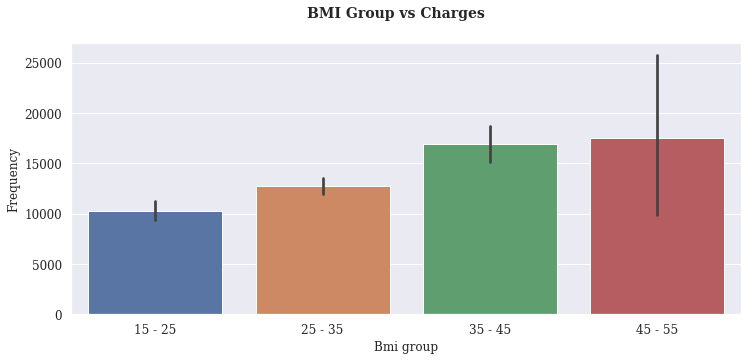

In [29]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(data=insurance, x='BMI Group', y='charges', ax=ax)

# Design
fig.suptitle('BMI Group vs Charges', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})
ax.set_ylabel('Frequency', fontdict={'fontsize' : 12, 
                                     'fontfamily' : 'serif'})

plt.show()

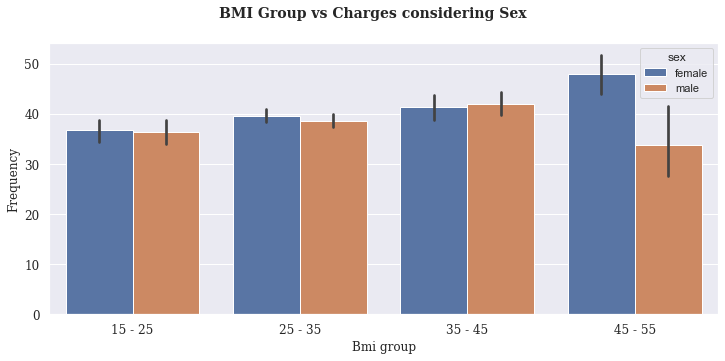

In [30]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(data=insurance, x='BMI Group', y='age', hue='sex', ax=ax)

# Design
fig.suptitle('BMI Group vs Charges considering Sex', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})
ax.set_ylabel('Frequency', fontdict={'fontsize' : 12, 
                                     'fontfamily' : 'serif'})

plt.show()

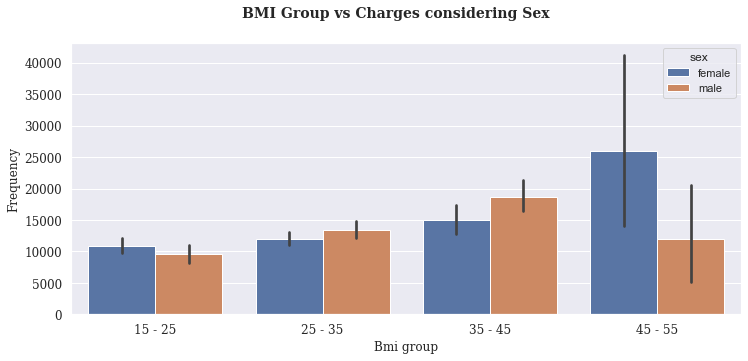

In [31]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(data=insurance, x='BMI Group', y='charges', hue='sex', ax=ax)

# Design
fig.suptitle('BMI Group vs Charges considering Sex', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})
ax.set_ylabel('Frequency', fontdict={'fontsize' : 12, 
                                     'fontfamily' : 'serif'})

plt.show()

**Observations**
- Females with most BMI has incurred more charges to the insurance company.
- BMI for male and female are not same.
- Beneficiary with high score of BMI has incurred more charges to insurance.

# Conclusion based on EDA
- As expected, as the age of the beneficiary increases ,the cost to insurance increases.
- Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , need to explore claims type to understand better.
- Males who smoke have most claims and have higher bills.
- Customer with bmi greater than 30 are on higher side of obesity, have more health issues and have higher claims.
- Females with BMI more than 45 have billed higher zto insurance.
- Age, BMI and Smoking are important attributes which can cost insurance company more.

# Statistical Analysis

## 1.) Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

<div class='alert alert-block alert-info'><font size=3>
<b> Step 1: Define null and alternative hypothesis</b></font>
 <br>

* $ \ H_0  :\mu_1 <= \mu_2  $ The average charges of smokers is less than or equal to nonsmokers   <br>
 <br>
* $ \ H_a  :\mu_1 > \mu_2 $ The average charges of smokers is greater than nonsmokers  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify the test</b></font>

Standard deviation of the population is not known  ,will perform a T - test. The ">" sign in alternate hypothesis indicate test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of sampling  distribution curve.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [32]:
# Getting values of smoker
smoker = insurance.loc[insurance['smoker'] == 'yes']

smoker.head(10)

,age,sex,bmi,children,smoker,region,charges,Age Group,BMI Group
0,19,female,27.90,0,yes,southwest,16884.92400,18 - 28,25 - 35
11,62,female,26.29,0,yes,southeast,27808.72510,58 - 68,25 - 35
14,27,male,42.13,0,yes,southeast,39611.75770,18 - 28,35 - 45
19,30,male,35.30,0,yes,southwest,36837.46700,28 - 38,35 - 45
23,34,female,31.92,1,yes,northeast,37701.87680,28 - 38,25 - 35
29,31,male,36.30,2,yes,southwest,38711.00000,28 - 38,35 - 45
30,22,male,35.60,0,yes,southwest,35585.57600,18 - 28,35 - 45
34,28,male,36.40,1,yes,southwest,51194.55914,28 - 38,35 - 45
38,35,male,36.67,1,yes,northeast,39774.27630,28 - 38,35 - 45
39,60,male,39.90,0,yes,southwest,48173.36100,58 - 68,35 - 45


In [33]:
# Seeing the count of examples of each feature
smoker.count()

age          274
sex          274
bmi          274
children     274
smoker       274
region       274
charges      274
Age Group    274
BMI Group    274
dtype: int64

In [34]:
# Getting values of non-smoker
non_smoker = insurance.loc[insurance['smoker'] == 'no']

non_smoker.head(10)

,age,sex,bmi,children,smoker,region,charges,Age Group,BMI Group
1,18,male,33.770,1,no,southeast,1725.55230,18 - 28,25 - 35
2,28,male,33.000,3,no,southeast,4449.46200,28 - 38,25 - 35
3,33,male,22.705,0,no,northwest,21984.47061,28 - 38,15 - 25
4,32,male,28.880,0,no,northwest,3866.85520,28 - 38,25 - 35
5,31,female,25.740,0,no,southeast,3756.62160,28 - 38,25 - 35
6,46,female,33.440,1,no,southeast,8240.58960,38 - 48,25 - 35
7,37,female,27.740,3,no,northwest,7281.50560,28 - 38,25 - 35
8,37,male,29.830,2,no,northeast,6406.41070,28 - 38,25 - 35
9,60,female,25.840,0,no,northwest,28923.13692,58 - 68,25 - 35
10,25,male,26.220,0,no,northeast,2721.32080,18 - 28,25 - 35


In [35]:
# Seeing the count of examples of each feature
non_smoker.count()

age          1064
sex          1064
bmi          1064
children     1064
smoker       1064
region       1064
charges      1064
Age Group    1064
BMI Group    1064
dtype: int64

In [91]:
# As we can see, the value count is different in non_smoker compared to smokers. So , we will adjust the values so it becomes the same size.

non_smoker = non_smoker.sample(274, replace=False)

charges_yes= smoker['charges']
charges_no= non_smoker['charges']

In [95]:
print('Average cost charged to insurance for smoker is {:.2f} and non-smoker is {:.2f}.'.format(charges_yes.mean(), charges_no.mean()))

Average cost charged to insurance for smoker is 32050.23 and non-smoker is 8235.85.


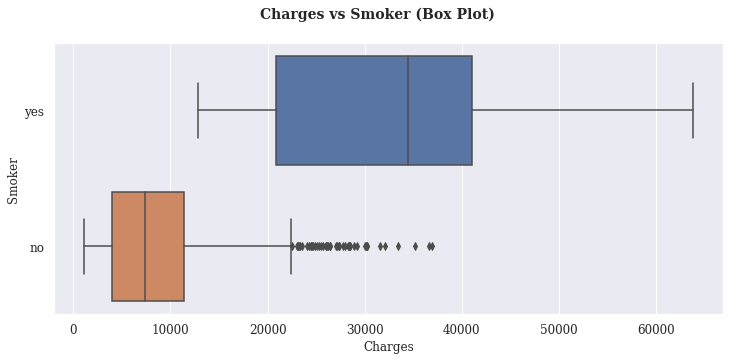

In [103]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.boxplot(data=insurance, x='charges', y='smoker', ax=ax)

# Design
fig.suptitle('Charges vs Smoker (Box Plot)', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})
ax.set_ylabel('Smoker', fontdict={'fontsize' : 12, 
                                     'fontfamily' : 'serif'})

plt.show()

In [110]:
# From this graph, we analyze that the claims are different , but we are not totally sure, so we will use t - test to be able to make sure.

alpha = 0.05
t_statistic, p_value = stats.ttest_ind(charges_yes, charges_no)

# Since it is one tailed, we should divide p_value by `2`

p_one_tail = p_value / 2

print('T - statistics value : {}\nTwo - sided p - value : {}\nOne - sided p - value : {}'.format(t_statistic, p_value, p_one_tail))

T - statistics value : 29.812899465499594
Two - sided p - value : 1.2174709915761046e-116
One - sided p - value : 6.087354957880523e-117


In [111]:
if p_one_tail < alpha :

    print("Conclusion : Since P value {} is less than alpha {} ". format (p_one_tail, alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    
else:
    
    print("Conclusion : Since P value {} is greater than alpha {} ". format (p_one_tail, alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion : Since P value 6.087354957880523e-117 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide whether to reject or failed to reject null hypothesis</b></font><br>    
    We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. 

## 2.) Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

<div class='alert alert-block alert-info'><font size=3>
<b> Step 1: Define null and alternative hypothesis</b></font>
<br>

Let $: \mu_1 , \mu_2 $ be the respective population means for BMI of males and BMI of females
 <br>
 <br>
* $\ H_0  : \mu_1 - \mu_2 = 0$ There is no difference between the BMI of Male  and BMI of female<br>
 <br>
* $\ H_a  :\mu_1 - \mu_2 != 0 $ There is difference between the BMI of Male and BMI of female.  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3:Identify the test</b></font><br>Standard deviation of the population is not known ,will perform a T - test. Not equal to sign in alternate hypothesis indicate its a two tailed test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [112]:
male_data = insurance.loc[insurance['sex'] == 'male']

male_data.head(10)

,age,sex,bmi,children,smoker,region,charges,Age Group,BMI Group
1,18,male,33.770,1,no,southeast,1725.55230,18 - 28,25 - 35
2,28,male,33.000,3,no,southeast,4449.46200,28 - 38,25 - 35
3,33,male,22.705,0,no,northwest,21984.47061,28 - 38,15 - 25
4,32,male,28.880,0,no,northwest,3866.85520,28 - 38,25 - 35
8,37,male,29.830,2,no,northeast,6406.41070,28 - 38,25 - 35
10,25,male,26.220,0,no,northeast,2721.32080,18 - 28,25 - 35
12,23,male,34.400,0,no,southwest,1826.84300,18 - 28,25 - 35
14,27,male,42.130,0,yes,southeast,39611.75770,18 - 28,35 - 45
15,19,male,24.600,1,no,southwest,1837.23700,18 - 28,15 - 25
17,23,male,23.845,0,no,northeast,2395.17155,18 - 28,15 - 25


In [113]:
male_data.count()

age          676
sex          676
bmi          676
children     676
smoker       676
region       676
charges      676
Age Group    676
BMI Group    676
dtype: int64

In [114]:
female_data = insurance.loc[insurance['sex'] == 'female']

female_data.head(10)

,age,sex,bmi,children,smoker,region,charges,Age Group,BMI Group
0,19,female,27.900,0,yes,southwest,16884.92400,18 - 28,25 - 35
5,31,female,25.740,0,no,southeast,3756.62160,28 - 38,25 - 35
6,46,female,33.440,1,no,southeast,8240.58960,38 - 48,25 - 35
7,37,female,27.740,3,no,northwest,7281.50560,28 - 38,25 - 35
9,60,female,25.840,0,no,northwest,28923.13692,58 - 68,25 - 35
11,62,female,26.290,0,yes,southeast,27808.72510,58 - 68,25 - 35
13,56,female,39.820,0,no,southeast,11090.71780,48 - 58,35 - 45
16,52,female,30.780,1,no,northeast,10797.33620,48 - 58,25 - 35
20,60,female,36.005,0,no,northeast,13228.84695,58 - 68,35 - 45
21,30,female,32.400,1,no,southwest,4149.73600,28 - 38,25 - 35


In [116]:
female_data.count()

age          662
sex          662
bmi          662
children     662
smoker       662
region       662
charges      662
Age Group    662
BMI Group    662
dtype: int64

In [117]:
# Since sample are approximately the same, we don't need to make sizes equal.

bmi_male = male_data['bmi']
bmi_female = female_data['bmi']

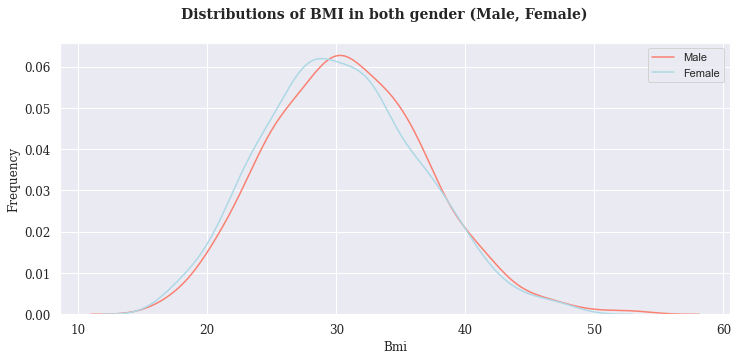

In [141]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.distplot(bmi_male, color='salmon', hist=False, ax=ax)
sns.distplot(bmi_female, color='lightblue', hist=False, ax=ax)

# Design
fig.suptitle('Distributions of BMI in both gender (Male, Female)', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})
ax.set_ylabel('Frequency', fontdict={'fontsize' : 12, 
                                  'fontfamily' : 'serif'})

ax.legend({'Male' : bmi_male, 'Female' : bmi_female})

plt.show()

In [143]:
# From this graph, we analyze that the distributions are same, but we are not totally sure, so we will use t - test to be able to make sure.

alpha = 0.05
t_statistic, p_value = stats.ttest_ind(bmi_male, bmi_female)

# Since it is two tailed test, we don't divide p_value by 2

print('T - statistics value : {}\nTwo - sided p - value : {}'.format(t_statistic, p_value))

T - statistics value : 1.696752635752224
Two - sided p - value : 0.08997637178984934


In [154]:
if p_value < alpha :

    print("Conclusion : Since P value {:.5f} is less than alpha {} ". format (p_value, alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    
else:
    
    print("Conclusion : Since P value {:.5f} is greater than alpha {} ". format (p_value, alpha))
    print("Failed to Reject Null Hypothesis that there is difference in bmi of men and bmi of female .")

Conclusion : Since P value 0.08998 is greater than alpha 0.05 
Failed to Reject Null Hypothesis that there is difference in bmi of men and bmi of female .


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide whethere to  reject or failed to reject null hypothesis</b></font><br>    
    We failed to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male. 

## 3.) Is the proportion of smokers significantly different across different regions?

<div class ="alert alert-block alert-info">
    <font size=3><b>    Step 1: Define null and alternative hypotheses</b></font>

* H<sub>0</sub> Smokers proportions is not significantly different across different regions
* H<sub>a</sub> Smokers proportions is  different across different regions  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify Test</b></font><br>
    Here we are comparing two different categorical variables, smoker and  different region. So perform a  Chi-sq Test.

In [159]:
# In order to use chi-sq test, we should have contingency table.

contingency = pd.crosstab(index=insurance['region'], columns=insurance['smoker'])

contingency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


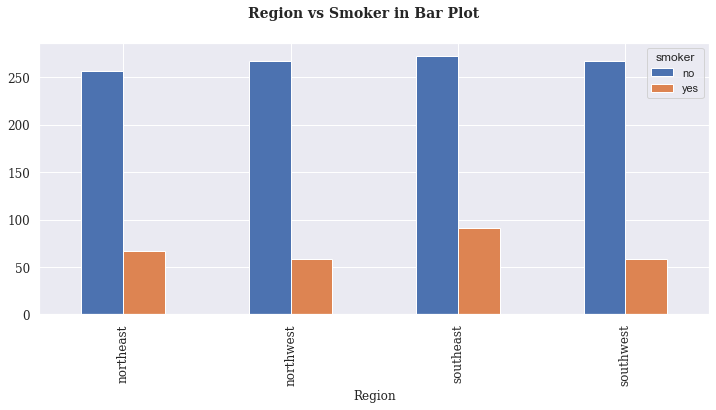

In [167]:
fig, ax = plt.subplots(figsize=(12, 5))

contingency.plot(kind='bar', ax=ax)

# Design
fig.suptitle('Region vs Smoker in Bar Plot', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})

plt.show()

In [172]:
# From this graph, we analyze that the barplots don't significantly differ from each other, but we are not totally sure, so we will use chi - sq test to be able to make sure.

alpha = 0.05
chi2, p_value, dof, expected_freq = chi2_contingency(contingency)

print('Chi - square statistic: {} \nP - value: {} \nDegree of freedom: {} \nExpected frequencies: \n{} '.format(chi2, p_value, dof, expected_freq))

Chi - square statistic: 7.343477761407071 
P - value: 0.06171954839170541 
Degree of freedom: 3 
Expected frequencies: 
[[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


In [174]:
if p_value < alpha :

    print("Conclusion : Since P value {:.5f} is less than alpha {} ". format (p_value, alpha) )
    print("Reject Null Hypothesis that Smokers proportions is not significantly different across different regions.")
    
else:
    
    print("Conclusion : Since P value {:.5f} is greater than alpha {} ". format (p_value, alpha))
    print("Failed to Reject Null Hypothesis that Smokers proportions is different across different regions.")

Conclusion : Since P value 0.06172 is greater than alpha 0.05 
Failed to Reject Null Hypothesis that Smokers proportions is different across different regions.


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We failed to reject the null hypothesis and conclude that Smoker proportions is not significantly different across different regions.
    

## 4.) Is the mean BMI of women with no children, one child, and two children the same?

<div class ="alert alert-block alert-info">
    <font size=3><b>    Step 1: Define null and alternative hypotheses</b></font>

* H<sub>0</sub>: μ1 = μ2 = μ3  The mean BMI of women with no children , one child,two children is same <br>

* H<sub>a</sub>:  Atleast  one of mean BMI of women is not same <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify Test</b></font><br>
    
One-way ANOVA - Because, we are comparing the means of BMI across three groups based on a single factor (number of children).

In [175]:
# Filtering data of only women with 0, 1 and 2 children

children_data = insurance.loc[(insurance['sex'] == 'female') & (insurance['children'] <= 2)]

children_data.head(10)

,age,sex,bmi,children,smoker,region,charges,Age Group,BMI Group
0,19,female,27.900,0,yes,southwest,16884.92400,18 - 28,25 - 35
5,31,female,25.740,0,no,southeast,3756.62160,28 - 38,25 - 35
6,46,female,33.440,1,no,southeast,8240.58960,38 - 48,25 - 35
9,60,female,25.840,0,no,northwest,28923.13692,58 - 68,25 - 35
11,62,female,26.290,0,yes,southeast,27808.72510,58 - 68,25 - 35
13,56,female,39.820,0,no,southeast,11090.71780,48 - 58,35 - 45
16,52,female,30.780,1,no,northeast,10797.33620,48 - 58,25 - 35
20,60,female,36.005,0,no,northeast,13228.84695,58 - 68,35 - 45
21,30,female,32.400,1,no,southwest,4149.73600,28 - 38,25 - 35
23,34,female,31.920,1,yes,northeast,37701.87680,28 - 38,25 - 35


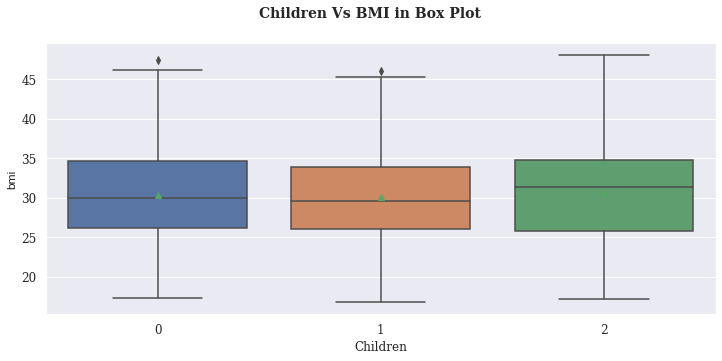

In [178]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.boxplot(data=children_data, x='children', y='bmi', showmeans=True)

# Design
fig.suptitle('Children Vs BMI in Box Plot', fontsize=14, fontweight='bold', fontfamily='serif')

ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize' : 12, 
                                                   'fontfamily' : 'serif'})

ax.set_xlabel(ax.get_xlabel().capitalize(), fontdict={'fontsize' : 12, 
                                                      'fontfamily' : 'serif'})

plt.show()

In [202]:
# From this graph, we analyze that the mean of barplots don't significantly differ from each other, but we are not totally sure, 
# so we will use one way anova test to be able to make sure.

formula = 'bmi ~ children'
model = ols(formula, children_data).fit()

aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
children,1.0,2.512982,2.512982,0.068411,0.79376
Residual,564.0,20717.738725,36.733579,NaN,NaN


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     P value is 0.79376 and it is greater than alpha(0.05), We failed to reject the null hypothesis and conclude that mean Bmi of women with no children,one children, two children is same. 
    

### Recommendation
- Based on EDA and statistical evidence it can be seen that customer who smoke or have higher BMI have more higher claims. We can encourage customers to quit smoking by providing them incentive points for talking to life coach, get help for improving lifestyle habits, Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
- High BMI  is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices.
- Provide discount coupons for Gym or fitness devices encouraging customers to exercise.